<a href="https://colab.research.google.com/github/imraunav/pattern-recognition/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import pandas as pd
import os
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt

# Importing data

In [ ]:
data_path = 'C:\\Users\\Raunav\\Desktop\\Assignment 2\\Data'
types_of_data = os.listdir(data_path)
types_of_data
train_path = data_path + '\\' + 'PB_train_csv'
pb_test_path = data_path + '\\' + 'PB_test_csv'
yt_test_path = data_path + '\\' + 'YT_test_csv'
languages = os.listdir(train_path)
languages


['asm',
 'ben',
 'eng',
 'guj',
 'hin',
 'kan',
 'mal',
 'mar',
 'odi',
 'pun',
 'tam',
 'tel']

In [ ]:
# importing training data
languages = os.listdir(train_path)
trainingDataDictionary = {}
for lang in languages:
    os.chdir(train_path+'\\'+lang)
    files = os.listdir()
    trainingDataFrame = pd.DataFrame()
    for file in files:
        tempDf = pd.read_csv(file,  delimiter=',',header=None, encoding='utf-16') # default seting used while creading the csv files 
        # np.concatenate(trainingData, tempDf.to_numpy())
        trainingDataFrame = pd.concat([trainingDataFrame, tempDf])
    trainingDataDictionary[lang] = trainingDataFrame.to_numpy()


In [ ]:
# importing PB testing data
languages = os.listdir(pb_test_path)
PBtestDataDictionary = {}
for lang in languages:
    os.chdir(pb_test_path+'\\'+lang)
    files = os.listdir()
    PBtestDataFrame = pd.DataFrame()
    for file in files:
        tempDf = pd.read_csv(file,  delimiter=',',header=None, encoding='utf-16') # default seting used while creading the csv files 
        # np.concatenate(trainingData, tempDf.to_numpy())
        PBtestDataFrame = pd.concat([PBtestDataFrame, tempDf])
    PBtestDataDictionary[lang] = PBtestDataFrame.to_numpy()


In [ ]:
# importing yt testing data
languages = os.listdir(yt_test_path)
YTtestDataDictionary = {}
for lang in languages:
    os.chdir(yt_test_path+'\\'+lang)
    files = os.listdir()
    YTtestDataFrame = pd.DataFrame()
    for file in files:
        tempDf = pd.read_csv(file,  delimiter=',',header=None, encoding='utf-16') # default seting used while creading the csv files 
        # np.concatenate(trainingData, tempDf.to_numpy())
        YTtestDataFrame = pd.concat([YTtestDataFrame, tempDf])
    YTtestDataDictionary[lang] = YTtestDataFrame.to_numpy()

In [ ]:
testingDataPB = np.empty([0, 39])
groundTruthPB = []
for label, lang in enumerate(PBtestDataDictionary.keys()):
    testingDataPB = np.concatenate([testingDataPB, PBtestDataDictionary[lang]], axis=0)
    groundTruthPB = groundTruthPB + [label]*len(PBtestDataDictionary[lang])

In [ ]:
testingDataYT = np.empty([0, 39])
groundTruthYT = []
for label, lang in enumerate(PBtestDataDictionary.keys()):
    testingDataYT = np.concatenate([testingDataYT, YTtestDataDictionary[lang]], axis=0)
    groundTruthYT = groundTruthYT + [label]*len(YTtestDataDictionary[lang])

In [ ]:
testingDataYT.shape

(458388, 39)

In [ ]:
testingDataPB.shape

(519095, 39)

In [ ]:
len(groundTruthPB), len(groundTruthYT)

(519095, 458388)

In [ ]:
Nk = []
for i in range(12):
    print(languages[i])
    Nk.append(len(os.listdir(train_path+'\\'+languages[i])))
Nk

asm
ben
eng
guj
hin
kan
mal
mar
odi
pun
tam
tel


[719, 379, 244, 358, 359, 391, 398, 241, 398, 242, 241, 388]

# System 1

Making the classifiers

In [ ]:
def make_prediction(classifiers, dataset):
    languages = classifiers.keys()
    prediction = [] # to store prediction made
    likelihood_collection = {}
    # for vector in dataset:
    #     likelihood = [get_score(classifiers[lang], [vector]) for lang in languages] # calculating likelihood of each vectors to belong to some class
    #     prediction.append(np.argmax(likelihood))
    
    # changing the code for faster operation
    for lang in languages:
        likelihood_collection[lang] = classifiers[lang].score_samples(dataset) #likelihood given by each classifier for all vectors
    
    for i in range(len(dataset)): #finding prediction for each vector
        lh = [likelihood_collection[lang][i] for lang in languages] #likelihood values of each vector against classes
        prediction.append(np.argmax(lh))

    return prediction

In [ ]:
def testClassifier(classifiers, test_dataset, ground_truth):
    predicted = [] 
    # for test_dataset in PBtestDataDictionary.items():
    predicted = predicted + make_prediction(classifiers=classifiers, dataset=test_dataset)
    accuracy = sklearn.metrics.accuracy_score(ground_truth, predicted)
    return predicted, accuracy

In [ ]:
def makeClassifier(trainingDataDictionary, n_components):
    classes = trainingDataDictionary.keys()
    classifiers = {}
    for i, lang in enumerate(classes):
        classifiers[lang] = GaussianMixture(n_components= n_components, covariance_type='diag') #classifier for each lang in the classifier dictionary
        classifiers[lang].fit(trainingDataDictionary[lang]) # fitting the classifier with individual lang datas
        # print(f'{i+1}) Weight of {lang} : {classifiers[lang].weights_}')
    return classifiers

Testing performance of classifier

In [ ]:
accuracy_list = []
components = range(1, 100, 5)
for i in components:
    classifier1 = makeClassifier(trainingDataDictionary=trainingDataDictionary, n_components=i)
    prediction, accuracy = testClassifier(classifier1, test_dataset=testingDataPB, ground_truth=groundTruthPB)
    accuracy_list.append(accuracy)    

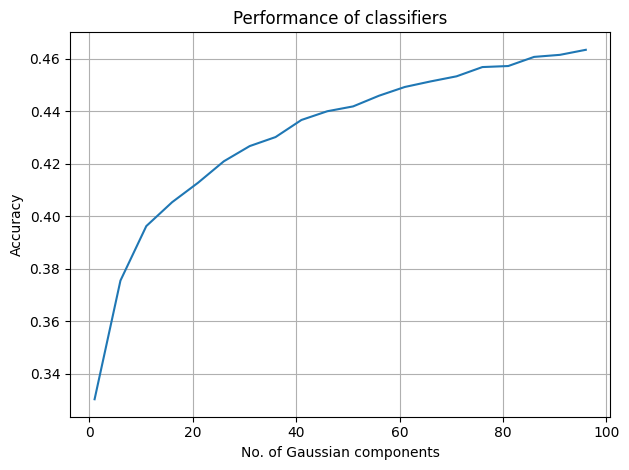

In [ ]:
plt.plot(components, accuracy_list)
plt.xlabel('No. of Gaussian components')
plt.ylabel('Accuracy')
plt.title('Performance of classifiers')
plt.grid()
plt.tight_layout()
# plt.ylim([0, 0.5])
plt.show()

In [ ]:
classifier1 = makeClassifier(trainingDataDictionary=trainingDataDictionary, n_components=50)

In [ ]:
predictionPB, accuracyPB = testClassifier(classifier1, test_dataset=testingDataPB, ground_truth=groundTruthPB)

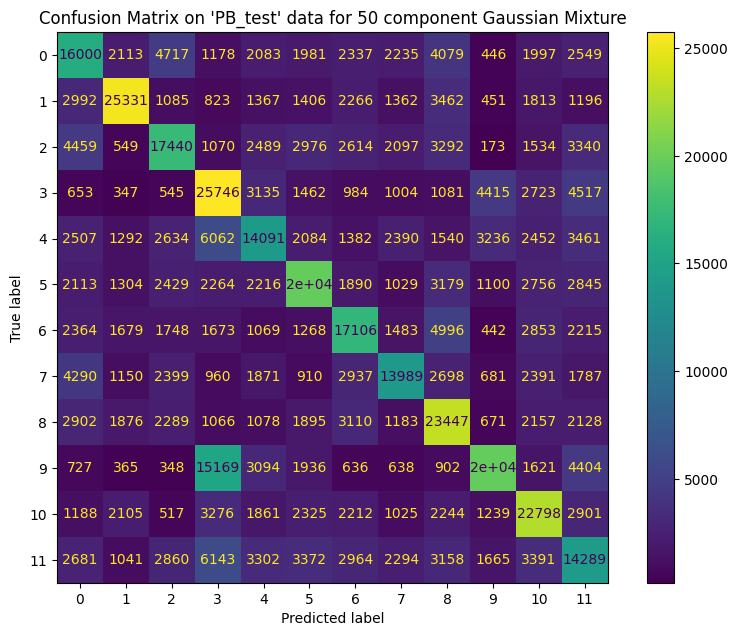

Accuracy of model on PB_test data : 0.4425201552702299


In [ ]:
labels = range(12)
confusion_matrix_pb = sklearn.metrics.confusion_matrix(groundTruthPB, predictionPB, labels=labels)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix_pb)
disp.plot()
plt.tight_layout(rect = [0, 0, 1.3, 1.3])
plt.title('Confusion Matrix on \'PB_test\' data for 50 component Gaussian Mixture')
plt.show()
print(f'Accuracy of model on PB_test data : {accuracyPB}')

In [ ]:
predictionYT, accuracyYT = testClassifier(classifier1, test_dataset=testingDataYT, ground_truth=groundTruthYT)

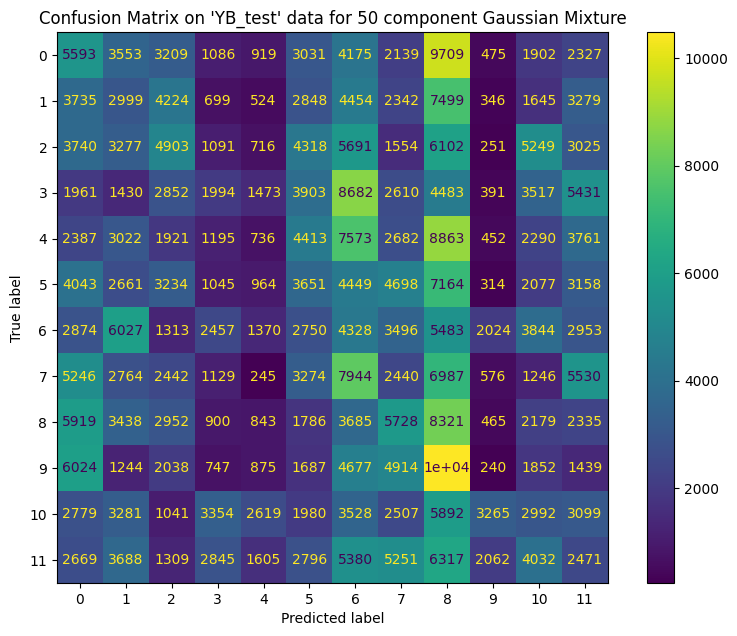

Accuracy of model on YT_test data : 0.08871959998952852


In [ ]:
labels = range(12)
confusion_matrix_yt = sklearn.metrics.confusion_matrix(groundTruthYT, predictionYT, labels=labels)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix_yt)
disp.plot()
plt.tight_layout(rect = [0, 0, 1.3, 1.3])
plt.title('Confusion Matrix on \'YT_test\' data for 50 component Gaussian Mixture')
plt.show()
print(f'Accuracy of model on YT_test data : {accuracyYT}')

# System 2

UBM-GMM

In [ ]:
Mixed_trainingData = np.empty(shape=(0, 39))
for dataset in trainingDataDictionary.values():
    Mixed_trainingData = np.concatenate([Mixed_trainingData, dataset], axis = 0)

In [ ]:
UBM_classifier = GaussianMixture(n_components=50, covariance_type= 'diag')

In [ ]:
UBM_classifier.fit(Mixed_trainingData)

GaussianMixture(covariance_type='diag', n_components=50)

In [ ]:
mixed_cov = UBM_classifier.covariances_
mixed_means = UBM_classifier.means_ # apply formula given in question paper
mixed_weights = UBM_classifier.weights_

In [ ]:
#MAP estimates
mixed_cov.shape, mixed_means.shape, mixed_weights.shape

((50, 39), (50, 39), (50,))

In [ ]:
MAP_estimated_ubms = {}
classes = list(trainingDataDictionary.keys())
r = 0.7 # relevance factor
import copy 
for i, lang in enumerate(classes):
    MAP_estimated_ubms[lang] = copy.deepcopy(UBM_classifier)
    N_k = np.sum(UBM_classifier.predict_proba(trainingDataDictionary[lang]), axis= 0).reshape((-1, 1))
    x_k = classifier1[lang].means_# (1/N_k) * UBM_classifier.predict_proba(trainingDataDictionary[lang]).T.dot(trainingDataDictionary[lang])#Partial mean
    alpha_k = N_k/(N_k + r).reshape(-1,1)
    MAP_estimated_ubms[lang].means_= alpha_k*x_k + (1- alpha_k) * UBM_classifier.means_

In [ ]:
predictions2, accuracy2 = testClassifier(MAP_estimated_ubms, testingDataPB, groundTruthPB)

In [ ]:
accuracy_2 = 51.7154654315

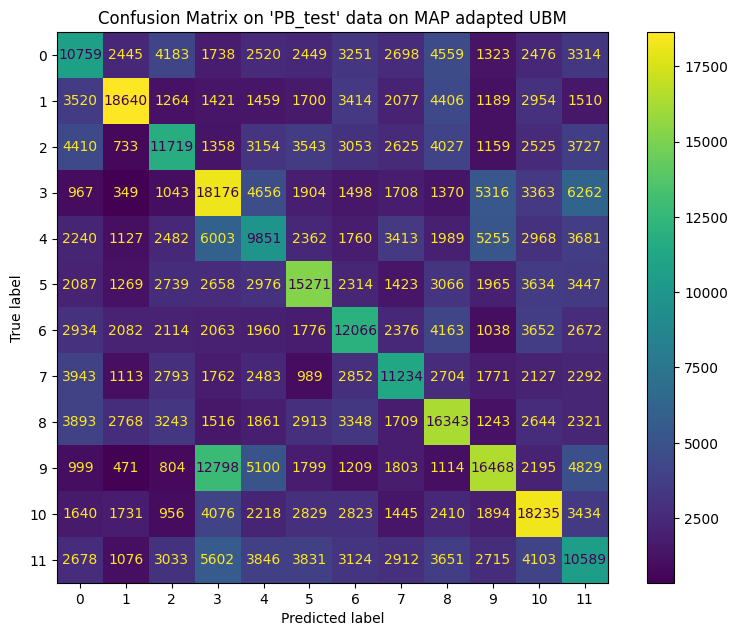

Accuracy of model on PB_test data : 51.7154654315


In [ ]:
labels = range(12)
confusion_matrix_2 = sklearn.metrics.confusion_matrix(groundTruthPB, predictions2, labels=labels)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix_2)
disp.plot()
plt.tight_layout(rect = [0, 0, 1.3, 1.3])
plt.title('Confusion Matrix on \'PB_test\' data on MAP adapted UBM')
plt.show()
print(f'Accuracy of model on PB_test data : {accuracy_2}')

In [ ]:
predictions2YT, accuracy2YT = testClassifier(MAP_estimated_ubms, testingDataYT, groundTruthYT)

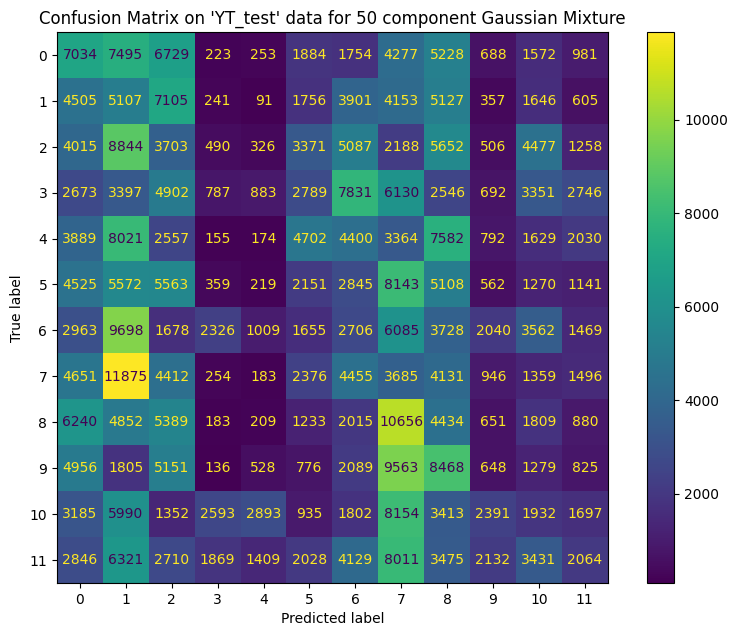

Accuracy of model on YT_test data : 0.07510013351134846


In [ ]:
labels = range(12)
confusion_matrix_2YT = sklearn.metrics.confusion_matrix(groundTruthYT, predictions2YT, labels=labels)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix_2YT)
disp.plot()
plt.tight_layout(rect = [0, 0, 1.3, 1.3])
plt.title('Confusion Matrix on \'YT_test\' data for 50 component Gaussian Mixture')
plt.show()
print(f'Accuracy of model on YT_test data : {accuracy2YT}')